In [132]:
import os
home=os.path.expanduser("~")

In [133]:
import findspark
findspark.init(os.path.join(home,"Developer","spark-2.0.0-bin-hadoop2.6"))

In [134]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [136]:
##Q01 세모

In [311]:
import urllib
from lxml import etree
from operator import add
uResponse = urllib.urlopen('https://ko.wikipedia.org/wiki/KBO_%ED%95%9C%EA%B5%AD%EC%8B%9C%EB%A6%AC%EC%A6%88')
_html = uResponse.read()
_htmlTree = etree.HTML(_html)
result = etree.tostring(_htmlTree, pretty_print=True, method="html")
nodes = _htmlTree.xpath('//table[@class="wikitable"][1]//tr/td[2]/a')
myls = []
for node in nodes:
    myls.append(node.text)
KBO_Rdd = spark.sparkContext.parallelize(myls)
myl = KBO_Rdd.collect()
#Q 1.1
for ww in myl:
    print ww
    
kbo = KBO_Rdd.map(lambda x: (x.lower().rstrip().lstrip().rstrip(',').rstrip('.'), 1))
wcReduceByKey = kbo.reduceByKey(add)
wclist = wcReduceByKey.sortByKey().collect()

#Q 1.2
for t in wclist:
    print t[0],"의 우승횟수",t[1]
    
nodes = _htmlTree.xpath('//table[@class="wikitable"][1]//tr/td[2]//small/a')

myls = []
for node in nodes:
    myls.append(node.text)
KBO_cheif_Rdd = spark.sparkContext.parallelize(myls)
kbo = KBO_cheif_Rdd.map(lambda x: (x.lower().rstrip().lstrip().rstrip(',').rstrip('.'), 1))
from operator import add
wcReduceByKey = kbo.reduceByKey(add)
_wclist = wcReduceByKey.sortByKey().collect()

#Q 1.3
for t in _wclist:
    print t[0],"의 우승횟수",t[1]

OB 베어스
해태 타이거즈
롯데 자이언츠
삼성 라이온즈
해태 타이거즈
해태 타이거즈
해태 타이거즈
해태 타이거즈
LG 트윈스
해태 타이거즈
롯데 자이언츠
해태 타이거즈
LG 트윈스
OB 베어스
해태 타이거즈
해태 타이거즈
현대 유니콘스
한화 이글스
현대 유니콘스
두산 베어스
삼성 라이온즈
현대 유니콘스
현대 유니콘스
삼성 라이온즈
삼성 라이온즈
SK 와이번스
SK 와이번스
KIA 타이거즈
SK 와이번스
삼성 라이온즈
삼성 라이온즈
삼성 라이온즈
삼성 라이온즈
두산 베어스
두산 베어스
kia 타이거즈 의 우승횟수 1
lg 트윈스 의 우승횟수 2
ob 베어스 의 우승횟수 2
sk 와이번스 의 우승횟수 3
두산 베어스 의 우승횟수 3
롯데 자이언츠 의 우승횟수 2
삼성 라이온즈 의 우승횟수 8
한화 이글스 의 우승횟수 1
해태 타이거즈 의 우승횟수 9
현대 유니콘스 의 우승횟수 4
강병철 의 우승횟수 2
김성근 의 우승횟수 3
김영덕 의 우승횟수 2
김응용 의 우승횟수 10
김인식 의 우승횟수 2
김재박 의 우승횟수 4
김태형 의 우승횟수 2
류중일 의 우승횟수 4
백인천 의 우승횟수 1
선동열 의 우승횟수 2
이광환 의 우승횟수 1
이희수 의 우승횟수 1
조범현 의 우승횟수 1


In [78]:
##Q02 O

In [312]:
#Q 2-1
import urllib
from lxml import etree
uResponse = urllib.urlopen('http://www.presidency.ucsb.edu/ws/index.php?pid=120000')
_html = uResponse.read()
_htmlTree = etree.HTML(_html)
result = etree.tostring(_htmlTree, pretty_print=True, method="html")
nodes = _htmlTree.xpath('//span[@class="displaytext"]/p')
f = open("./data/Trump.txt",'w')
for i, node in enumerate(nodes):
    mystr = node.text
    estr = mystr.encode('ascii', 'ignore').decode('ascii')
    f.write(estr)
f.close()

In [313]:
import os
lines=spark.sparkContext.textFile(os.path.join("data","Trump.txt"))
wc=lines\
    .flatMap(lambda x: x.split(' ')).map(lambda x: (x.lower().rstrip().lstrip().rstrip(',').rstrip('.'), 1))

In [314]:
from operator import add
wcReduceByKey = wc.reduceByKey(add)

In [315]:
words = wcReduceByKey.sortByKey().collect()

In [317]:
#Q 2-2
for w in words:
    if w[1] >= 5:
        print w[0]

a
across
again
all
america
american
and
are
at
back
be
but
by
country
dreams
every
for
from
great
has
have
in
is
it
make
many
nation
never
new
no
not
now
of
on
one
other
our
people
protected
right
same
that
the
their
they
this
to
we
while
will
with
world
you
your


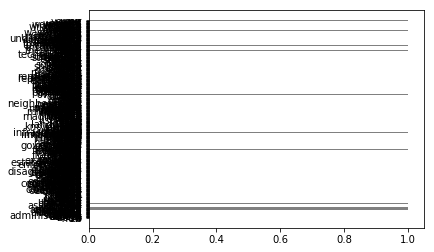

In [318]:
#Q 2-3
% matplotlib inline
import matplotlib.pyplot as plt

count = map(lambda x: x[1] >= 10, words)
word = map(lambda x: x[0], words)
plt.barh(range(len(count)), count, color = 'grey')
plt.yticks(range(len(count)), word)
plt.show()